# Machine Learning Assignment 2 : Guassian Mixture model <br/>

### Dataset Link :  [Here](https://drive.google.com/open?id=1rSH9G3NfARk76APW1mcFaiHXluCFUPt2) 

<br/><br/>
Course code : CMPE-257
Group name : Seekers <br/>
Members : 
                    * Anuradha Rajashekar(012409956)
                    * Ashwini Shankar Narayan(012506910)
                    * Nidhi Jamar(010070593)
                    * Sindhu Goudru Shivanandappa Patil(010823683)
                    

The dataset consists of a list of customers and their statistics related to the credit card transactions over time. The data set contains 18 columns(features) and more than 8k rows(number of samples) of credit card user information. The business objective is to cluster these customers into groups of good customers and bad customers so that the credit card company can target specific promotions to each group of customers. 

To acheive this goal, we follow the steps below:
1. Data preparation - Anuradha Rajashekar
2. Applying GMM clustering - Ashwini Shankar Narayan
3. Apply PCA to understand the dataset - Nidhi Jamar
4. Analysing the resultant clusters - Sindhu Goudru Shivanandappa Patil
5. Conclusion - Entire team


In [1]:
# imports used in this ipynb file
import numpy as np # numpy to process numeric data
import pandas as pd # use of dataframes for processing data for plots and K means 
import matplotlib.pyplot as plt # plotting data
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture # kmeans class for clustering
import seaborn as sns # plotting 

###  1. Data Preparation

In this step, we read and preprocess the data to identify and remove any invalid values such as NA or ?. 

* Read and parse the csv file using the pandas Dataframe. Pandas provide a unique advantage over other libraries in preprocessing the data by providing inbuilt APIs for all the math operations on selected row/column or full dataset.
* Fill all invalid cells with median value of the column.
* In our dataset we donot have any columns with String values, hence there is no need for any transformation of data.
* There is no need to randomize the data as there is no pattern in the samples.

In [2]:
# import the data from a file and process the missing feilds
data =pd.read_csv("ML_Course_HW_1.csv")
# Check if there are any missing values in the data and fill them with medians of the same column
missing = data.isna().sum()
data = data.fillna( data.median() )
vals = data.iloc[ :, 1:].values
print(missing)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


Now that the dataset is patched for missing values, we understand the variance  and information content of the dataset. 

In [4]:
coll = list(data.columns)
coll.remove("CUST_ID")
print("Column Name\tMIN\tMAX\tMEDIAN\tInformation Content")

ic = []
for c in coll:
    ic.append(np.var(data[c])/(np.max(data[c])-np.min(data[c])))
ic=ic/np.sum(ic)
i=0
for c in coll:
    print("{}\t{}\t{}\t{}\t{}".format(c,data[c].min(),data[c].max(),data[c].median(),ic[i]))
    i=i+1
    
    

Column Name	MIN	MAX	MEDIAN	Information Content
BALANCE	0.0	19043.13856	873.385231	0.1897029001178299
BALANCE_FREQUENCY	0.0	1.0	1.0	4.6794106748593525e-05
PURCHASES	0.0	49039.57	361.28	0.07761761588539094
ONEOFF_PURCHASES	0.0	40761.25	38.0	0.056358107083192686
INSTALLMENTS_PURCHASES	0.0	22500.0	89.0	0.030305783555706033
CASH_ADVANCE	0.0	47137.211760000006	0.0	0.07779419864570981
PURCHASES_FREQUENCY	0.0	1.0	0.5	0.00013431910787788646
ONEOFF_PURCHASES_FREQUENCY	0.0	1.0	0.083333	7.420922212161031e-05
PURCHASES_INSTALLMENTS_FREQUENCY	0.0	1.0	0.166667	0.00013170628952933027
CASH_ADVANCE_FREQUENCY	0.0	1.5	0.0	2.2260869247126827e-05
CASH_ADVANCE_TRX	0	123	0.0	0.0003157196450070908
PURCHASES_TRX	0	358	7.0	0.0014390750517725335
CREDIT_LIMIT	50.0	30000.0	3000.0	0.3685779212485436
PAYMENTS	0.0	50721.483360000006	856.901546	0.13777508360312848
MINIMUM_PAYMENTS	0.019163	76406.20752000001	312.343947	0.059384073346596136
PRC_FULL_PAYMENT	0.0	1.0	0.0	7.13338589001659e-05
TENURE	6	12	12.0	0.000248898362

The data above shows 9 columns with relatively high information contnent than other correseponding colunms.the 8 columns are BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS	

###  2. Apply GMM Clustering 

In previous assignment, we understand that we can cluster data in 4 groups and anything greater than 4 would give us smaller groups and any less would give us groups englufing multiple bigger groups. In both the situations  it would be very hard to distinguish the charecteristics of the cluster. 
In this step we only select the values from the columns listed above and use guassian mixture model to cluster them into groups.

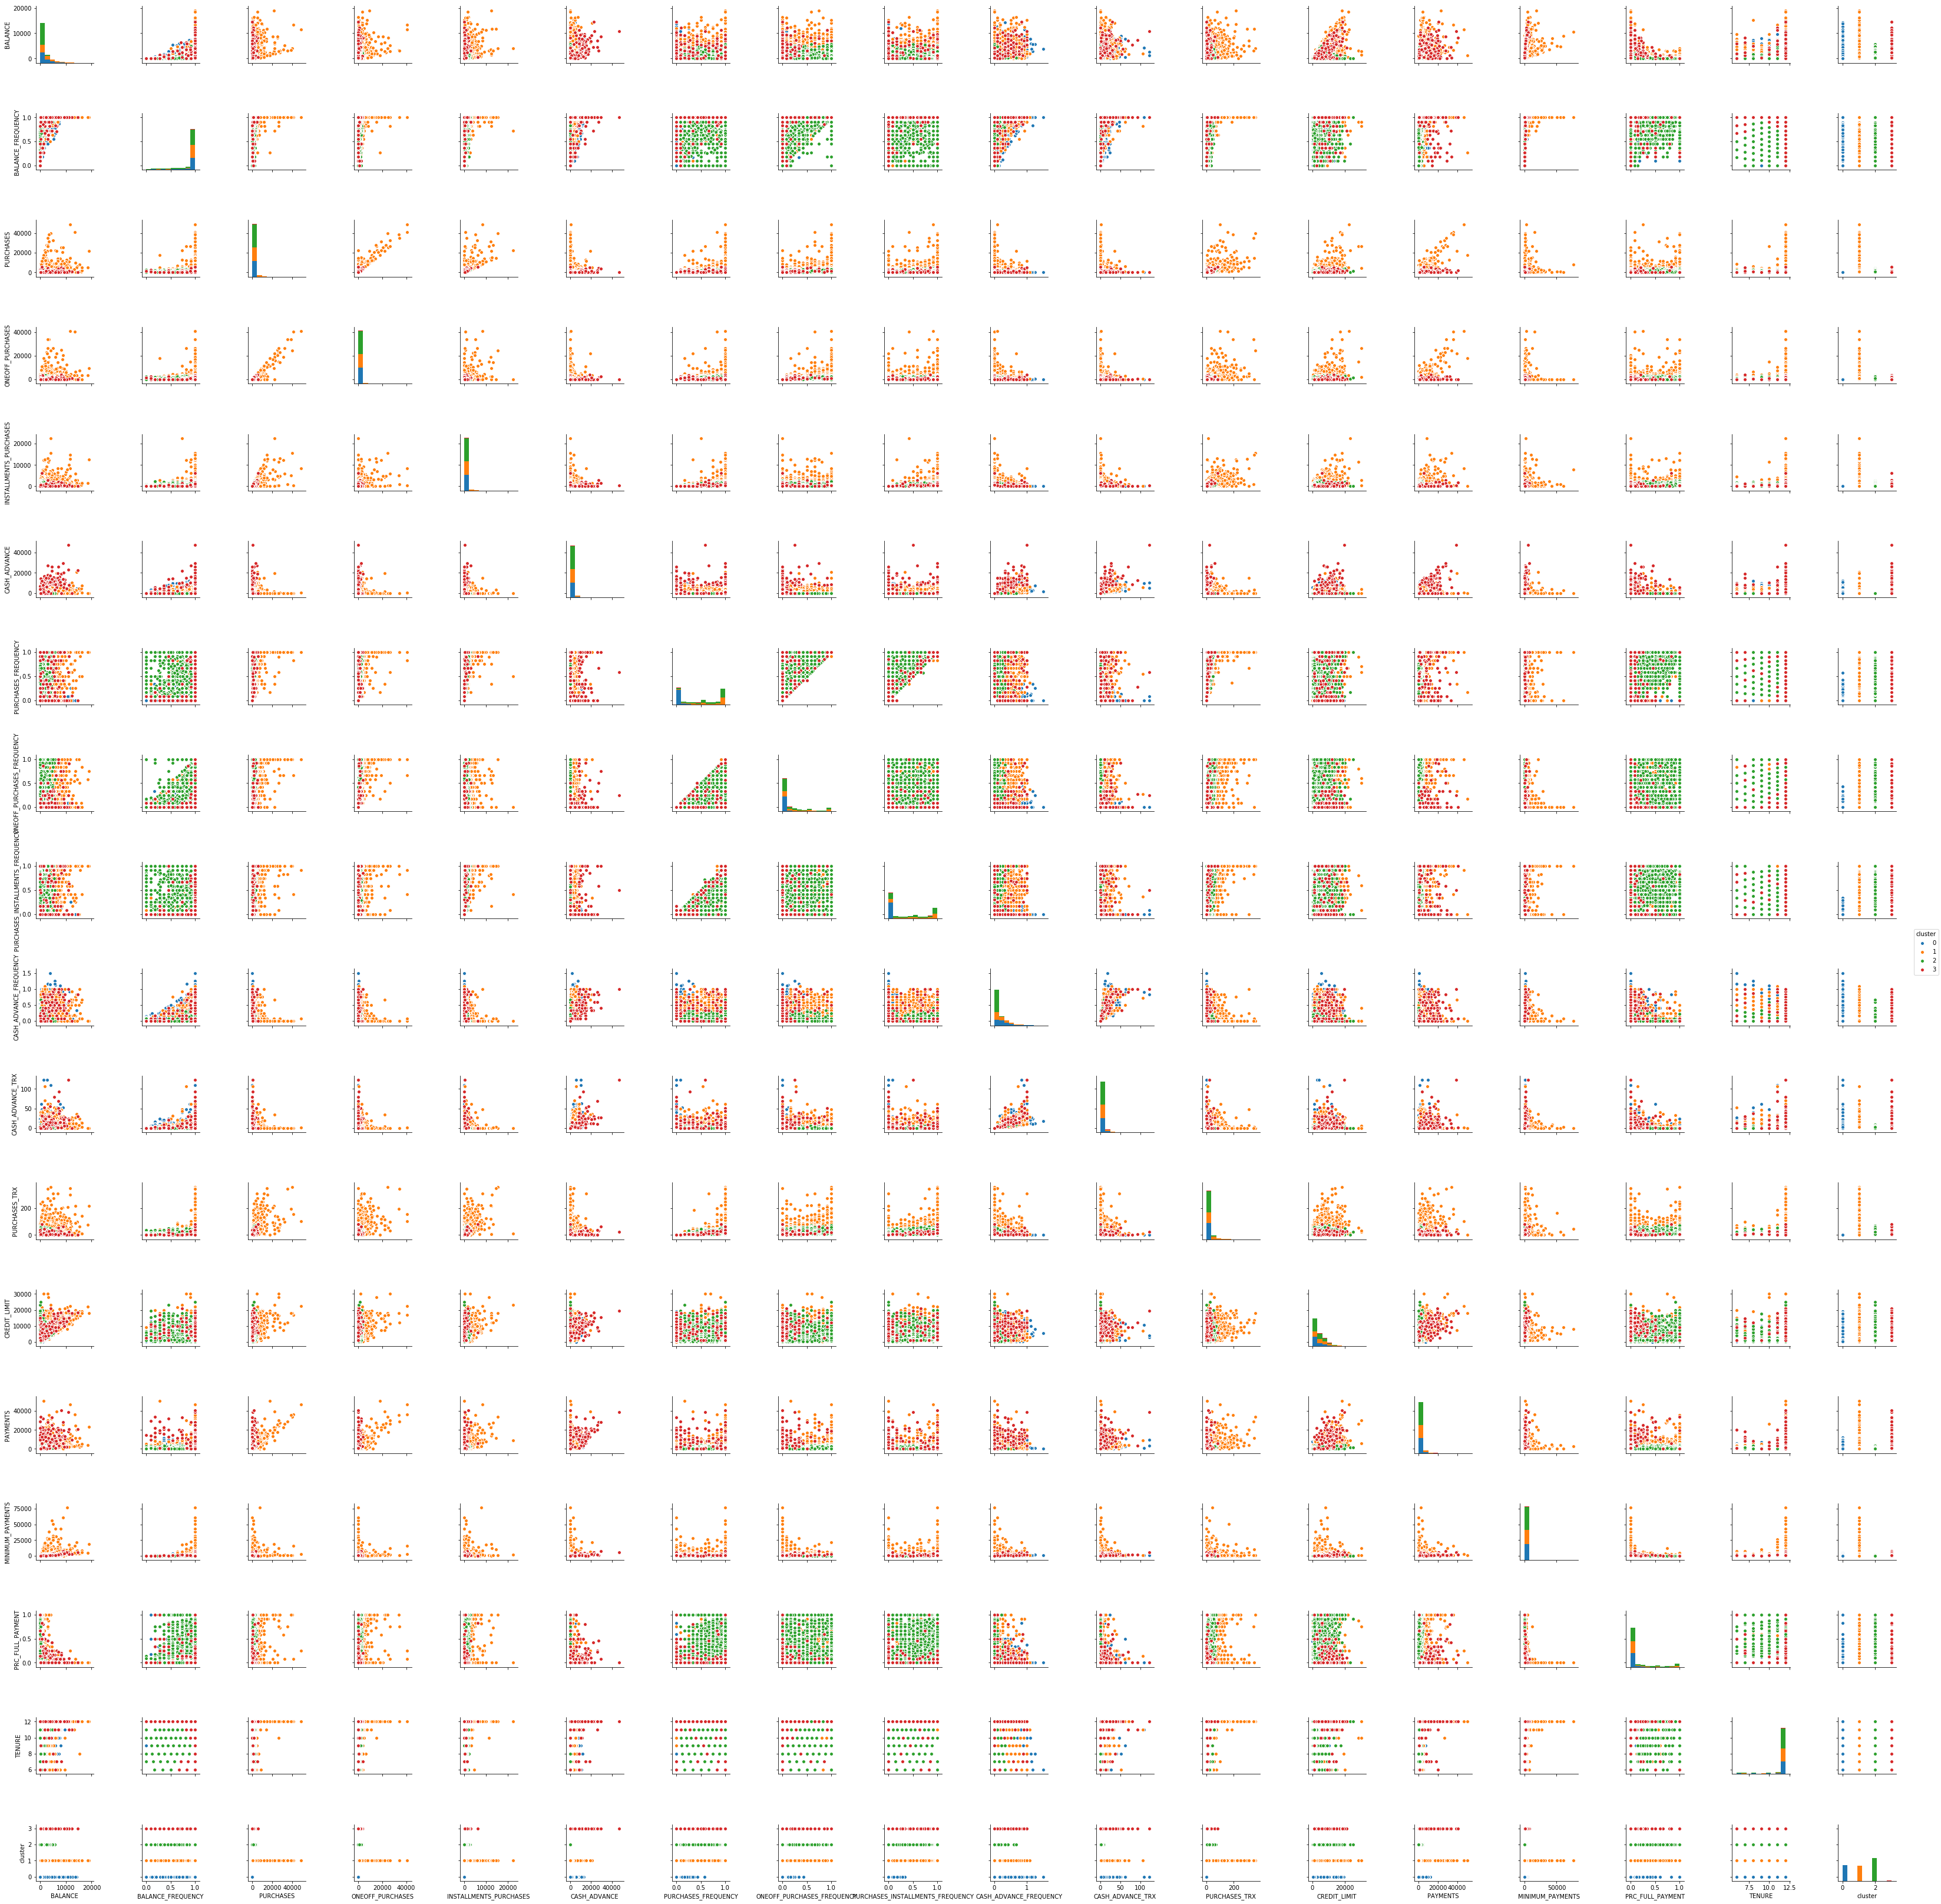

In [8]:
cols = ["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]
vals = data[cols].iloc[ :, 1:].values
gmm = BayesianGaussianMixture(n_components=4, covariance_type='full').fit(vals)
y_pred = gmm.predict( vals )
data["cluster"] = y_pred
cols = list(data.columns)
cols.remove("CUST_ID")

sns.pairplot( data[ cols ], hue="cluster")

###  3. Apply PCA to understand the dataset

In previous assignment, we made the assumption that our data has only two main dimentions that contribute significatly for any analysis on this dataset, ie. Payments and Purchases. One good way to test this assumption is to plot the data along first two major the Principle components.

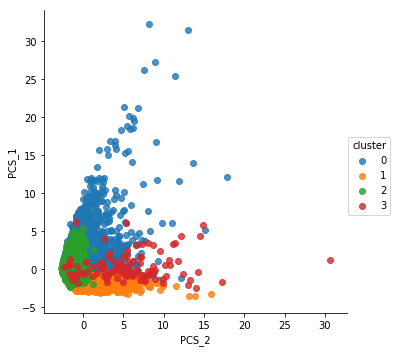

In [11]:
cols = list(data.columns)
cols.remove("CUST_ID")
cols.remove("cluster")
X = data[cols].iloc[ :, 1:].values
Y = data["cluster"]
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

data["PCS_1"] = Y_sklearn[:,0]
data["PCS_2"] = Y_sklearn[:,1]
sns.lmplot("PCS_2","PCS_1", data=data, hue='cluster',fit_reg=False)

plt.show()

From the graphg above, its clear that all 4 groups of our data are clearly spread between the PC1 and PC2 axis. One very intresting point is that the red cluster and the orange cluster are aligned along PCS_2 axis stating that there are closes related. This analysis closely relates to our analysis in the previous assignemnt, that two groups among the clusters made either small payment or only minimum payments.
The Other two clusters are aligned towards PCS_1 or inbetween PCS_1(Green) & PCS_2(Blue).

###  4. Analysing the resultant clusters


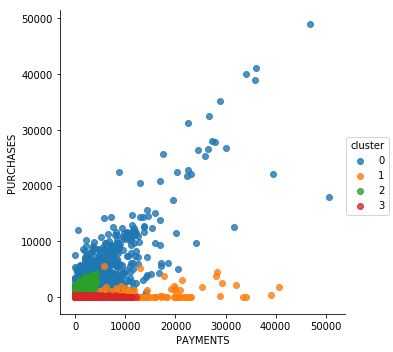

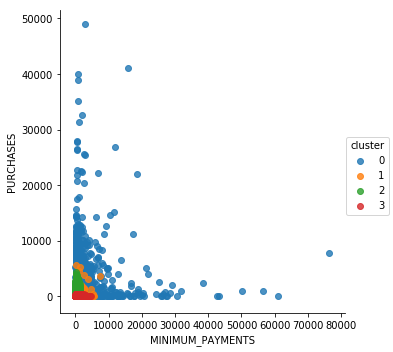

In [14]:
sns.lmplot("PAYMENTS","PURCHASES", data=data, hue='cluster', fit_reg=False)
sns.lmplot("MINIMUM_PAYMENTS","PURCHASES", data=data, hue='cluster', fit_reg=False)
plt.show()

After analysing the graphs, we can group the credit card customers into 4 categories.

1. #### Large Purchases and Large Payments (indicated in Blue) - This group of customers consists of customers making medium to large payments and/or purchases. This group is already making good amount of purchases and making large payments, hence no promotions are required.

2. #### Small Purchases and made more payments (indicated in Orange) - These customers made more payments(>Minimum Payments) and small purchases. This group only makes smaller purchases and hence promotions related to purchase rewards would help them buy more.

3. #### moderate Payments and moderate purchases (indicated in Green) - These customers  made moderate purchases and payments. This group require more promotions to make there purchases higher and payments higher.

4. #### Small Payments and very small or no purchases (indicated in Red) - These customers make small or no purchases and small payments. This group requires promotions to boost their purchases and that will inturn make them pay more.




### 5. Conclusion

 ##### Compare and contrast with K-means.
Our usecase/Buissiness dataset is more probablistic and hence a hard clustering approach like K Means will always produce more outliers. In such scenarios use of a probablistic model helps us understand the data better by providing probablities for existance in each cluster and thus will help understand the characteristic of each cluster better.  Hence Guassian mixture model gives us a better clustering compared to the K means and better outlier handling. 

 ##### How does this affect the development of your story about your data set?
 As our usecase is full of numbers, frequencies and probablities, a probablistic approach like GMM will provide a better clustering, as it can be seen in the graphs above.

##### Any new insights?
* In K-Means, there was some confusion in distinguising customers with moderate payment to customers in small payment and using GMM that seperation is clearly seen. 
* K-Means had various outliers far out in to other clusters territory and in GMM the outliers are handled very clearly.